In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix,log_loss  
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Loading the data set
df_train= pd.read_csv("C:/Users/Siri/Downloads/Arya_DataScientist_Assignment/training_set.csv")
df_test= pd.read_csv("C:/Users/Siri/Downloads/Arya_DataScientist_Assignment/test_set.csv")

In [3]:
df_train.shape

(3910, 59)

In [4]:
df_test.shape

(691, 58)

- Here the shape of train and test sets are (3910,59) and (691,58)

In [5]:
df_train.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [6]:
df_train.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [8]:
df_train['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

In [9]:
df_train['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

The number of 0's are 60% and 1's are 40% available in the data. 

In [10]:
df_train = df_train.drop(['Unnamed: 0'], axis = 1)

In [11]:
df_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [12]:
X = df_train.iloc[:,0: -1]
y= df_train['Y']

In [13]:
importance = mutual_info_classif(X,y)
feat_importance = pd.Series(importance, index=df_train.columns[0:-1])

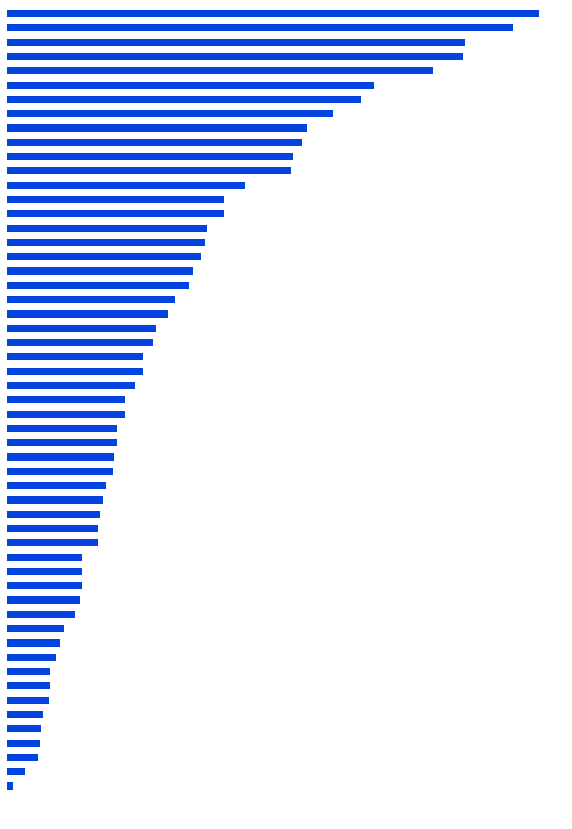

In [14]:
feat_importance.sort_values().plot(kind='barh', color=sns.xkcd_rgb['blue'], figsize=[10,15])
plt.style.use('dark_background')
plt.axis('off')
plt.grid(b=None)
plt.show()

In [15]:
feature_set = feat_importance[feat_importance > 0.05].index.to_list()

In [16]:
len(feature_set)

26

-Splittig the Dtrain data set in the ration of 4:1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
clf = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
clf.fit(X_train,y_train)
feature_importance = clf.feature_importances_

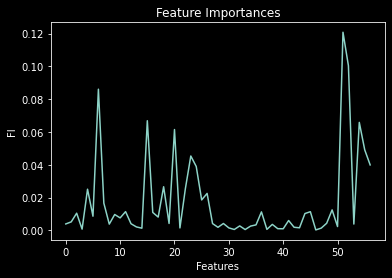

In [19]:
x = [x for x in range(X_train.shape[1])]
plt.plot(x,feature_importance)
plt.xlabel("Features")
plt.ylabel("FI")
plt.title("Feature Importances")
plt.show()

In [20]:
# Finding total features having greater feature importance than average
mean_fi = np.mean(feature_importance)
top_fi = len(np.where(feature_importance > mean_fi)[0])
print(f'Total features having feature importance greater than average are {top_fi}')

Total features having feature importance greater than average are 15


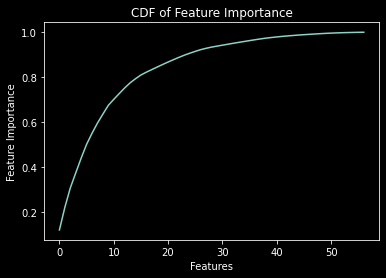

In [21]:
# CDF Plot of Feature Importance
plt.plot(np.cumsum(sorted(feature_importance,reverse=True)))
plt.title('CDF of Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance');

In [22]:
# Ranking the features with their respect to feature importances
fi = sorted(zip(X.columns,feature_importance),key=lambda x: x[1], reverse=True)
# Extracting Top 30 features
top_features = [x[0] for x in fi[:30]]

In [23]:
# Selecting the top features from data
X_train_dash = X_train[top_features]
X_test_dash = X_test[top_features]

In [24]:
# Checking the shape of X_train_dash
X_train_dash.shape

(3128, 30)

In [25]:
# Checking the shape of X_test_dash
X_test_dash.shape

(782, 30)

In [26]:
# Using StandardScaler to normalize our data
scaler = StandardScaler()
scaler.fit(X_train_dash)

# transform
X_train_dash = pd.DataFrame(scaler.transform(X_train_dash),columns=X_train_dash.columns)
X_test_dash = pd.DataFrame(scaler.transform(X_test_dash),columns=X_test_dash.columns)

In [27]:
#Here we are trying the different model to check the train test logg loss 

In [28]:
y_train_prob = np.random.rand(len(X_train_dash))
y_test_prob = np.random.rand(len(X_test_dash))

In [29]:
# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 1.0062308522846004
Test Logloss for the model -> 0.9894387008863481
--------------------------------------------------
Train AUC Score for the model -> 0.4975577989022206
Test AUC Score for the model -> 0.5193073889936568


In [30]:
estimator = KNeighborsClassifier()
parameters = {'n_neighbors':[3,5,11,15,25,51,75]}

# Performing GridSearchCV
clf = GridSearchCV(estimator, parameters, cv=10, n_jobs=-1, scoring='roc_auc', return_train_score=True)
clf.fit(X_train_dash, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11, 15, 25, 51, 75]},
             return_train_score=True, scoring='roc_auc')

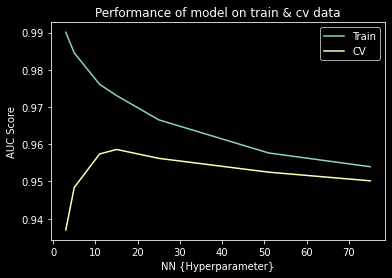

In [31]:
# Storing all the results of GridSearchCV in a DataFrame
results = pd.DataFrame.from_dict(clf.cv_results_)
#results.head()

x = list(results['param_n_neighbors'].values)
y1 = results['mean_train_score'].values
y2 = results['mean_test_score'].values

plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='CV')
plt.legend()
plt.xlabel('NN {Hyperparameter}')
plt.ylabel('AUC Score')
plt.title('Performance of model on train & cv data');

In [32]:
# Using 30-NN for predictions
classifier = KNeighborsClassifier(n_neighbors=30) 
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')


Train Logloss for the model -> 0.2437244023785907
Test Logloss for the model -> 0.3308426046101558
--------------------------------------------------
Train AUC Score for the model -> 0.9649530316262148
Test AUC Score for the model -> 0.9468061032058974


In [33]:
# Using Gaussian Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 1.3496150846468156
Test Logloss for the model -> 1.733101124459516
--------------------------------------------------
Train AUC Score for the model -> 0.9598403362533424
Test AUC Score for the model -> 0.9405177438710783


In [34]:
# Using l2 norm
estimator = LogisticRegression(penalty='l2', max_iter=250, random_state=42)
parameters = {'C':[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]}

# Performing GridSearchCV
clf = GridSearchCV(estimator, parameters, cv=10, n_jobs=-1, scoring='neg_log_loss', return_train_score=True)
clf.fit(X_train_dash, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=250, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                               1000.0, 10000.0]},
             return_train_score=True, scoring='neg_log_loss')

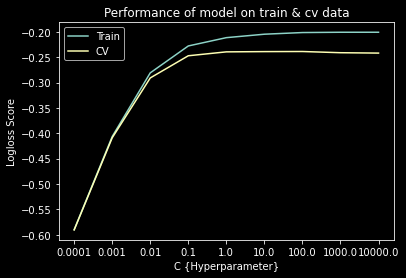

In [35]:
# Storing all the results of GridSearchCV in a DataFrame
results = pd.DataFrame.from_dict(clf.cv_results_)
#results.head()

x = list(map(str,results['param_C'].values))
y1 = results['mean_train_score'].values
y2 = results['mean_test_score'].values

plt.plot(x, y1, label='Train')
plt.plot(x, y2, label='CV')
plt.legend()
plt.xlabel('C {Hyperparameter}')
plt.ylabel('Logloss Score')
plt.title('Performance of model on train & cv data');

In [36]:
# Using Logistic Regression with l2 norm
classifier = LogisticRegression(C=1, penalty='l2', max_iter=250, random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.21237818513536336
Test Logloss for the model -> 0.3348204877090184
--------------------------------------------------
Train AUC Score for the model -> 0.9731317150883998
Test AUC Score for the model -> 0.9584707697582717


In [37]:
# Using Decision Tree
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=3,random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.006204642281228122
Test Logloss for the model -> 2.968986476937994
--------------------------------------------------
Train AUC Score for the model -> 0.9999579854809827
Test AUC Score for the model -> 0.9073615635179153


In [38]:
# Using Random Forest
classifier = RandomForestClassifier(n_estimators=500,
                                      max_depth=None,
                                      min_samples_split=2,
                                      n_jobs=-1,
                                      class_weight='balanced',
                                      random_state=42)
classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.04344247323063367
Test Logloss for the model -> 0.14434748671891243
--------------------------------------------------
Train AUC Score for the model -> 0.9999991425608363
Test AUC Score for the model -> 0.9929333104748843


In [39]:
# Using Xgboost
classifier = XGBClassifier(n_estimators=500,
                           max_depth=5,
                           learning_rate=0.15,
                           colsample_bytree=1,
                           subsample=1,
                           reg_alpha = 0.3,
                           gamma=10,
                           n_jobs=-1,
                           eval_metric='logloss',
                           use_label_encoder=False)

classifier.fit(X_train_dash, y_train)

y_train_pred = classifier.predict(X_train_dash)
y_train_prob = classifier.predict_proba(X_train_dash)[:,1]
y_test_pred = classifier.predict(X_test_dash)
y_test_prob = classifier.predict_proba(X_test_dash)[:,1]


# Calculating logloss score for our model
print(f'Train Logloss for the model -> {log_loss(y_train,y_train_prob)}')
print(f'Test Logloss for the model -> {log_loss(y_test,y_test_prob)}')

print('-'*50)
# Calculating the AUC score for our model
print(f'Train AUC Score for the model -> {roc_auc_score(y_train, y_train_prob)}')
print(f'Test AUC Score for the model -> {roc_auc_score(y_test, y_test_prob)}')

Train Logloss for the model -> 0.14307064304510583
Test Logloss for the model -> 0.15659173917563637
--------------------------------------------------
Train AUC Score for the model -> 0.988952325096344
Test AUC Score for the model -> 0.9873889936567805


- Here we are going with the XGBoost because it shows very less log loss values 